In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import datetime as dt

In [5]:
from collections import Counter

In [6]:
import matplotlib.pyplot as plt

### Import Data

In [8]:
XRP_Increase = pd.read_csv('../XRP_5min_Decrease_SmallAmount_5min.csv')

In [7]:
original_columns = ['datetime_real','date','close','high','low','open','quoteVolume','volume','weightedAverage']

In [ ]:
XRP_Increase.head()

In [9]:
np.array( [1,2,3,4,5,6])*0.1

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [10]:
for n in np.array( [1,2,3,4,5,6,8,10])*0.1:
    XRP_Increase['shift_open_{}'.format(n)] = XRP_Increase['Increase_{}_percent'.format(n)].shift(1)

for 0.6% incraese:

how many continous increase are there?

In [11]:
XRP_Increase['diff_0.6'] = XRP_Increase['shift_open_0.6000000000000001'] - XRP_Increase['Increase_0.6000000000000001_percent']

In [12]:
list(Counter(XRP_Increase['diff_0.6']).keys())[:3]

[nan, 0.0, 29763000.0]

In [13]:
#(XRP_Increase[XRP_Increase['diff_0.6'] != 0]['diff_0.6'].value_counts())/(len(XRP_Increase))

In [14]:
XRP_Increase[XRP_Increase['diff_0.6'] != 0]['diff_0.6'].value_counts()#.plot()

-3.000000e+02    49080
 3.000000e+02     8216
-6.000000e+02     6844
-9.000000e+02     4038
 6.000000e+02     3682
-1.200000e+03     2771
 9.000000e+02     2549
-1.500000e+03     2219
 1.200000e+03     1888
-1.800000e+03     1704
 1.500000e+03     1526
-2.100000e+03     1428
 1.800000e+03     1278
-2.400000e+03     1139
 2.100000e+03     1039
-2.700000e+03      991
 2.400000e+03      908
-3.000000e+03      887
-3.300000e+03      798
 2.700000e+03      780
 3.300000e+03      722
 3.000000e+03      722
-3.600000e+03      701
-3.900000e+03      639
-4.200000e+03      615
 3.600000e+03      563
 3.900000e+03      550
-4.500000e+03      544
 4.200000e+03      514
 4.500000e+03      482
                 ...  
 1.914661e+09        1
-4.014900e+06        1
-2.545200e+06        1
 1.043100e+07        1
-1.894923e+09        1
-2.608500e+06        1
 1.914678e+09        1
 2.608800e+06        1
 1.043550e+07        1
 4.014300e+06        1
 2.609100e+06        1
 2.606400e+06        1
-6.714000e+

In [15]:
n = 6*0.1

## Adjust for waiting

In [16]:
XRP_Analysis_table = XRP_Increase

In [17]:
XRP_Analysis_table['2H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(2*2).mean().shift(1)

In [18]:
time_event = {}
starting_asset = 50
bought_crypto = False


gold_available = starting_asset 
XRP_amount = 0


drop_limit = 0.005 # used mean on this side, actual 0.004686, but decreased abit for optimistic view 

stop_loss_limit = 0.01
sell_limit = 0.006

while gold_available >= 0:
    
    #for ind, df in XRP_Analysis_table[XRP_Analysis_table['datetime_real'] > '2017-07-07'].iterrows():
    for ind, df in XRP_Analysis_table[-5000:].iterrows():
#         print(df['date'])
        
        if bought_crypto != True: # then looking to buy at drop limit or lower
            if ( df['2H_RA_on_Close'] - df['low'] ) / df['2H_RA_on_Close'] >= drop_limit:
                "then buy crypto"
                
                ## might add here a waiting time!!! ###

                XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

                gold_available -= gold_available
                
                time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})
                
                last_xrp_traction_price =  df['low']
                
                bought_crypto = True
                
#                 print('last_xrp_traction_price ', last_xrp_traction_price)
                
        else:
            if bought_crypto: # has crypto, either wait or sell at stoploss or profit
#                 print('hit_sell_limit',
#                       (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit ,
#                       round((df['high'] - last_xrp_traction_price),6) ,
#                       'sell_limit ', sell_limit
                     
#                       )
                
                if ( df['2H_RA_on_Close'] - df['low'] ) / df['2H_RA_on_Close'] >= stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})
                    
                    bought_crypto = False
                    
                    
                
                elif  (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit: # then hit target price, sell for profit
                    
#                     print(last_xrp_traction_price)
                                        
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at high price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_profit' , df['high'])})
                    
                    bought_crypto = False

    break
                
else:
    print('Negative asset: bankrupt  ->>>   ',  gold_available)

In [19]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

In [20]:
transation_log['Gold'] = round(transation_log['Gold'], 2)

In [21]:
transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

In [1]:
transation_log.head()

NameError: name 'transation_log' is not defined

In [23]:
dt.datetime.fromtimestamp(transation_log.index.min())

datetime.datetime(2019, 7, 15, 16, 10)

In [24]:
dt.datetime.fromtimestamp(transation_log.index.max())

datetime.datetime(2019, 7, 31, 13, 40)

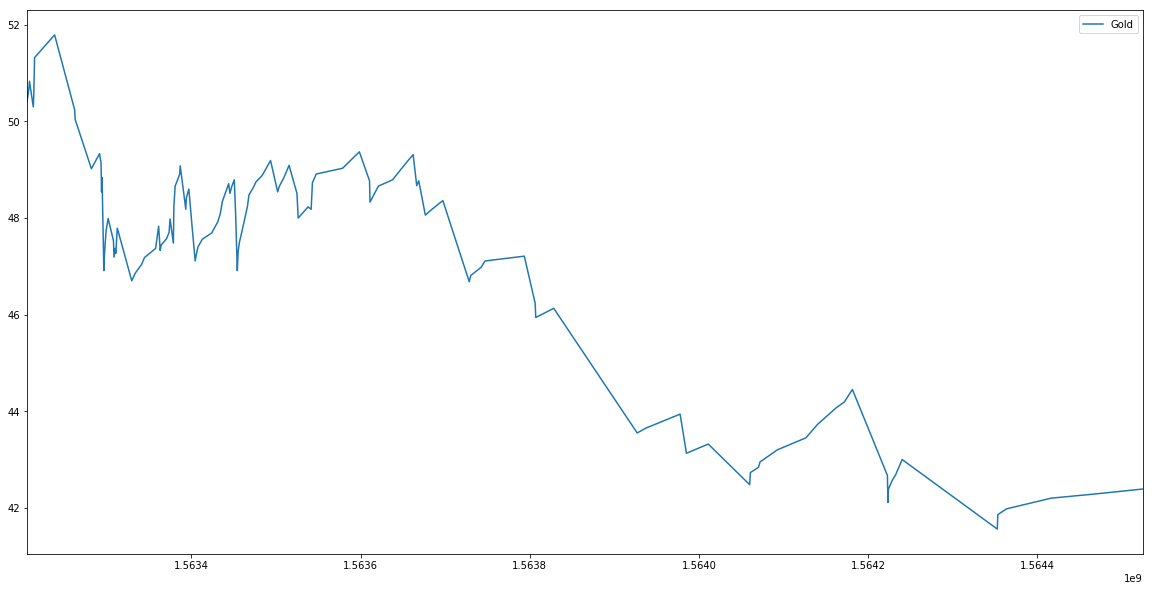

In [25]:
transation_log[transation_log['action'] != 'brought'][['Gold']].plot(figsize = (20,10))

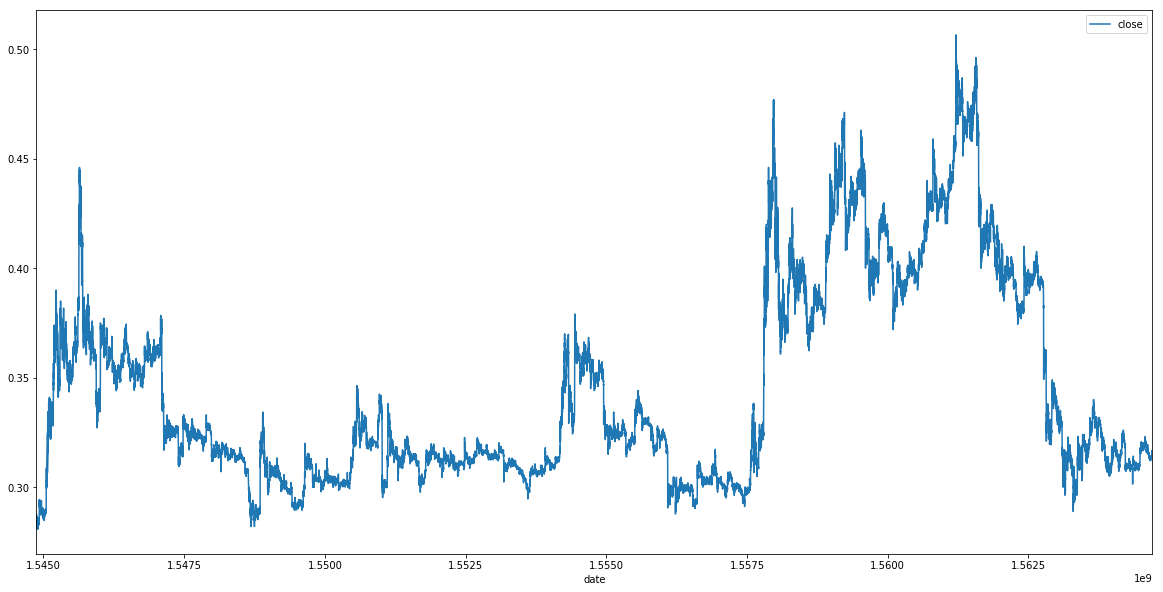

In [26]:
XRP_Analysis_table[400000:][['date','close']].set_index('date').plot(figsize = (20,10))

In [27]:
#stable phase

print(data1['datetime_real'].min(), '  slice: ', start1)
print(data1['datetime_real'].max(), '  slice: ', end1)

NameError: name 'data1' is not defined

In [ ]:
plt.figure(figsize= (20,10))

################################


data0 = XRP_Analysis_table[original_columns].set_index('date')

x0 = data0.index
y0 = data0['close']

## rolling data
# data1['20min_rolling'] = data1['close'].rolling(4).mean().shift(1)
# y1_r = data1['20min_rolling']

################################

start1 = 410000
end1 = start1 + 20000

print(start, end, (end-start)/12, 'hour')
data1 = XRP_Analysis_table[start1:end1][original_columns].set_index('date')



x1 = data1.index
y1= data1['close']

## rolling data
# data1['20min_rolling'] = data1['close'].rolling(4).mean().shift(1)
# y1_r = data1['20min_rolling']

################################


xmin = XRP_Analysis_table.set_index('date').index.min()
xmax = XRP_Analysis_table.set_index('date').index.max()

# ymin = 0.287
# ymax = 0.324


plt.plot(x0,y0)

plt.plot(x1,y1)

# plt.plot(x1,y1_r)

# plt.plot(x2,y2)

# plt.plot(x3,y3)

plt.xlim([xmin,xmax])
plt.ylim([0,3.5])

In [ ]:
data1[['close']].plot(figsize = (20,10))

In [ ]:
stable_times = XRP_Analysis_table[start1:end1].copy()

In [ ]:
for n in np.array( [1,2,3,4,5,6, 8 , 10])*0.1:
    stable_times['diff_{}'.format(round(n, 1))] = stable_times['shift_open_{}'.format(n)] - stable_times['Increase_{}_percent'.format(n)]

In [ ]:
stable_times['diff_0.6'] = stable_times['shift_open_0.6000000000000001'] - stable_times['Increase_0.6000000000000001_percent']

In [ ]:
list(Counter(stable_times['diff_0.6']).keys())[:3]

In [ ]:
stable_times.columns

In [ ]:
[d for d in stable_times.columns if 'diff' in d]

In [ ]:
stable_times['date'].max()

In [ ]:
for col in [d for d in stable_times.columns if 'Increase' in d]:
    print(col)
    unique_increase_hit = len(stable_times[(stable_times[col] < stable_times['date'].max()) & (stable_times['volume'] != 0)][col].unique())
    print( unique_increase_hit/ len(stable_times) )
    print('pure_increase:' , float(col.split('_')[1]) * (unique_increase_hit/ len(stable_times)) *100  )
    print('at',  float(col.split('_')[1])  )
    
    print('='*10)

In [ ]:
float(col.split('_')[1])

In [ ]:
for col in [d for d in stable_times.columns if 'diff' in d]:
    counting = (stable_times[stable_times[col] != 0][col].value_counts())/(len(stable_times))

    counting = pd.DataFrame.from_dict(counting).reset_index()

    display(counting.head())

# counting_increase = counting[counting['index'] < 0]

# counting_decrease = counting[counting['index'] > 0]

# counting_increase.head()

In [ ]:
counting.head()

In [28]:
counting_increase['diff_0.6'].cumsum().plot( ylim = [0,0.3])

NameError: name 'counting_increase' is not defined

In [29]:
counting_decrease['diff_0.6'].cumsum().plot()

NameError: name 'counting_decrease' is not defined

In [ ]:
stable_times[stable_times['diff_0.6'] != 0]['diff_0.6'].value_counts().head()#.plot()

In [ ]:
stable_times

In [30]:
# XRP_Analysis_table[-5000:][['date','close']].set_index('date').plot(figsize = (20,10))

In [31]:
# XRP_Analysis_table[-5000:-4500][['date','close']].set_index('date').plot(figsize = (20,10))

In [32]:
plt.figure(figsize= (20,10))

################################

start1 = -4708
end1 = start1 + 24

print(start, end, (end-start)/12, 'hour')
data1 = XRP_Analysis_table[start:end][original_columns].set_index('date')



x1 = data1.index
y1= data1['close']

## rolling data
data1['20min_rolling'] = data1['close'].rolling(4).mean().shift(1)
y1_r = data1['20min_rolling']

################################


start2 = -4780
end2 = start2 + 24

print(start2, end2, (end2-start2)/12, 'hour')
data2 = XRP_Analysis_table[start2:end2][original_columns].set_index('date')

x2 = data2.index
y2= data2['close']


################################

start3 = -5000
end3 = start3 + 180

print(start3, end3, (end3-start3)/12, 'hour')
data2 = XRP_Analysis_table[start3:end3][original_columns].set_index('date')

x3 = data2.index
y3= data2['close']


################################


xmin = XRP_Analysis_table[-5000:-4500][original_columns].set_index('date').index.min()
xmax = XRP_Analysis_table[-5000:-4500][original_columns].set_index('date').index.max()

ymin = 0.287
ymax = 0.324

plt.plot(x1,y1)
plt.plot(x1,y1_r)

plt.plot(x2,y2)

plt.plot(x3,y3)

plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

NameError: name 'start' is not defined

<Figure size 1440x720 with 0 Axes>

## analysing data1

In [33]:
data1['close'] = data1.apply(lambda x: None if x['volume'] == 0 else x['close'], axis =1 )

NameError: name 'data1' is not defined

In [ ]:
data1['10min_rolling'] = data1['close'].rolling(2).mean().shift(1)
data1['10min_rolling'] = data1['10min_rolling'].fillna(method = 'ffill')

In [ ]:
data1['10min_dif']= round(((data1['low'] - data1['10min_rolling'])/data1['10min_rolling']) * 100,4)

In [34]:
data1['10min_dif'].plot()

NameError: name 'data1' is not defined

In [35]:
data1['10min_dif'].plot()

NameError: name 'data1' is not defined

In [36]:
XRP_Analysis_table[XRP_Analysis_table['date'].isin(list(data1[data1['10min_dif'] < -1.3].index )+ [1563306600])].T

NameError: name 'data1' is not defined

In [ ]:
data1[data1['10min_dif'] < -1.3]

In [ ]:
data1

In [37]:
XRP_Analysis_table[-5000:-4980]

,Unnamed: 0,Unnamed: 0.1,close,date,high,low,open,quoteVolume,volume,weightedAverage,...,shift_open_0.1,shift_open_0.2,shift_open_0.30000000000000004,shift_open_0.4,shift_open_0.5,shift_open_0.6000000000000001,shift_open_0.8,shift_open_1.0,diff_0.6,2H_RA_on_Close
461096,10548,10548,0.318843,1563202800,0.318843,0.318843,0.318843,0.000000,0.000000,0.318843,...,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,0.0,0.317355
461097,10549,10549,0.316500,1563203100,0.316560,0.316332,0.316560,2651.920401,839.282272,0.316481,...,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,900.0,0.317851
461098,10550,10550,0.316007,1563203400,0.316007,0.316007,0.316007,19.950000,6.304345,0.316007,...,1.563205e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,0.0,0.317761
461099,10551,10551,0.315460,1563203700,0.316221,0.315460,0.316221,847.429332,267.637396,0.315823,...,1.563205e+09,1.563205e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,0.0,0.317548
461100,10552,10552,0.315460,1563204000,0.315460,0.315460,0.315460,0.000000,0.000000,0.315460,...,1.563205e+09,1.563205e+09,1.563205e+09,1.563205e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,0.0,0.316703
461101,10553,10553,0.315460,1563204300,0.315460,0.315460,0.315460,0.000000,0.000000,0.315460,...,1.563205e+09,1.563205e+09,1.563205e+09,1.563205e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,0.0,0.315857
461102,10554,10554,0.315460,1563204600,0.315460,0.315460,0.315460,0.000000,0.000000,0.315460,...,1.563205e+09,1.563205e+09,1.563205e+09,1.563205e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,0.0,0.315597
461103,10555,10555,0.315036,1563204900,0.315036,0.315036,0.315036,1001.624998,315.547642,0.315036,...,1.563205e+09,1.563205e+09,1.563205e+09,1.563205e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,0.0,0.315460
461104,10556,10556,0.316800,1563205200,0.316800,0.315122,0.315122,6638.620000,2100.623937,0.316425,...,1.563205e+09,1.563205e+09,1.563205e+09,1.563205e+09,1.563205e+09,1.563206e+09,1.563206e+09,1.563206e+09,0.0,0.315354
461105,10557,10557,0.319790,1563205500,0.319790,0.318843,0.318843,11513.795284,3680.997682,0.319703,...,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,1.563206e+09,-900.0,0.315689


In [38]:
XRP_Analysis_table[-5000:-4500][original_columns].set_index('date')#.plot(figsize = (20,10))

,datetime_real,close,high,low,open,quoteVolume,volume,weightedAverage
date,,,,,,,,
1563202800,2019-07-15 16:00:00,0.318843,0.318843,0.318843,0.318843,0.000000,0.000000,0.318843
1563203100,2019-07-15 16:05:00,0.316500,0.316560,0.316332,0.316560,2651.920401,839.282272,0.316481
1563203400,2019-07-15 16:10:00,0.316007,0.316007,0.316007,0.316007,19.950000,6.304345,0.316007
1563203700,2019-07-15 16:15:00,0.315460,0.316221,0.315460,0.316221,847.429332,267.637396,0.315823
1563204000,2019-07-15 16:20:00,0.315460,0.315460,0.315460,0.315460,0.000000,0.000000,0.315460
1563204300,2019-07-15 16:25:00,0.315460,0.315460,0.315460,0.315460,0.000000,0.000000,0.315460
1563204600,2019-07-15 16:30:00,0.315460,0.315460,0.315460,0.315460,0.000000,0.000000,0.315460
1563204900,2019-07-15 16:35:00,0.315036,0.315036,0.315036,0.315036,1001.624998,315.547642,0.315036
1563205200,2019-07-15 16:40:00,0.316800,0.316800,0.315122,0.315122,6638.620000,2100.623937,0.316425


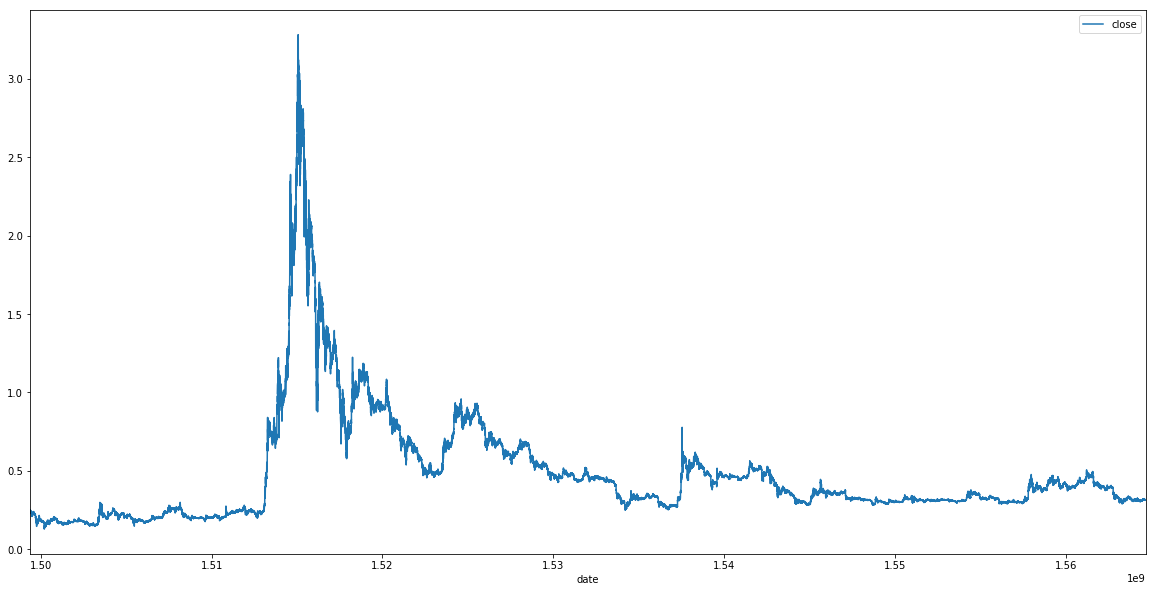

In [39]:
XRP_Analysis_table[XRP_Analysis_table['datetime_real'] > '2017-07-07'][['date','close']].set_index('date').plot(figsize = (20,10))

In [40]:
transation_log['action'].unique()

array(['brought', 'sell_profit', 'stop_loss_hit'], dtype=object)

### Transaction 

stable times :
    
start1 = 410000

end1 = start1 + 20000

In [41]:
start1 = 410000

end1 = start1 + 20000

In [42]:
trading_data = XRP_Analysis_table[start1:end1][original_columns + ['Increase_0.5_percent']]

In [43]:
trading_data['2H_RA_on_Close'] = trading_data['close'].rolling(2*2).mean().shift(1)

In [122]:
trading_data['below_2H'] = (trading_data['low'] - trading_data['2H_RA_on_Close'])/trading_data['2H_RA_on_Close']

#### increa_decre     * need to impliment!

very important factor to eliminate those that decrease more than the stop limit before increase happens

In [127]:
# g1 = trading_data[~trading_data['increa_decre']][['date','below_2H_RA']]

# plt.plot(g1['date'], g1['below_2H_RA'], 'r', label = 'loss')

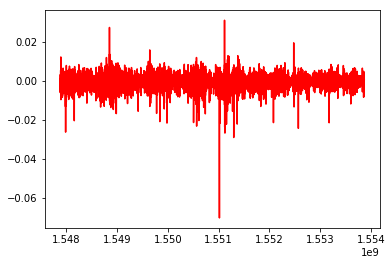

In [129]:
g1 = trading_data[['date','below_2H']]

plt.plot(g1['date'], g1['below_2H'], 'r', label = 'loss')

In [133]:
g1['below_2H'].describe()

count    1.999600e+04
mean    -3.839776e-04
std      2.840165e-03
min     -7.048004e-02
25%     -1.274045e-03
50%     -7.915321e-15
75%      7.136058e-04
max      3.116528e-02
Name: below_2H, dtype: float64

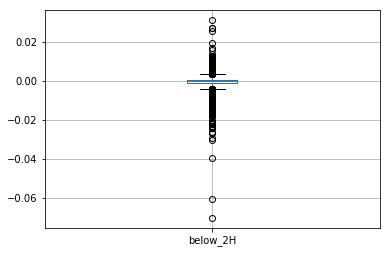

In [131]:
g1.boxplot(column = 'below_2H')

In [177]:
time_event = {}
starting_asset = 100
bought_crypto = False


gold_available = starting_asset 
XRP_amount = 0


drop_limit = 0.005 # used mean on this side, actual 0.004686, but decreased abit for optimistic view 

stop_loss_limit = 0.01
sell_limit = 0.005

while gold_available >= 0:
    
    for ind, df in trading_data.iterrows():
#         print(df['date'])
        
        if bought_crypto != True: # then looking to buy at drop limit or lower
            if ( df['2H_RA_on_Close'] - df['low'] ) / df['2H_RA_on_Close'] >= drop_limit:
                "then buy crypto"

                XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

                gold_available -= gold_available
                
                time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})
                
                last_xrp_traction_price =  df['low']
                
                bought_crypto = True
                
                latest_bought_crypto_timestamp = df['date']
                
#                 print('last_xrp_traction_price ', last_xrp_traction_price)
                
        else:
            if bought_crypto: # has crypto, either wait or sell at stoploss or profit
#                 print('hit_sell_limit',
#                       (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit ,
#                       round((df['high'] - last_xrp_traction_price),6) ,
#                       'sell_limit ', sell_limit
                     
#                       )

                if df['date'] - latest_bought_crypto_timestamp > 1800:
                    
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'time_stop' ,  df['low'])})
                    
                    bought_crypto = False
                    
                
                elif ( df['2H_RA_on_Close'] - df['low'] ) / df['2H_RA_on_Close'] >= stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})
                    
                    bought_crypto = False
                    
                    
                
                elif  (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit: # then hit target price, sell for profit
                    
#                     print(last_xrp_traction_price)
                                        
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at high price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_profit' , df['high'])})
                    
                    bought_crypto = False

    break
                
else:
    print('Negative asset: bankrupt  ->>>   ',  gold_available)

In [178]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

transation_log['Gold'] = round(transation_log['Gold'], 2)

transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

In [179]:
transation_log.head(10)

,Gold,XRP_Amount,action,price_action_happened
1547880900,0.00,311.1054,brought,0.320792
1547883000,99.65,0.0000,time_stop,0.320951
1547894100,0.00,301.3852,brought,0.329978
1547896200,98.95,0.0000,time_stop,0.327319
1547904900,0.00,302.1940,brought,0.326771
1547907000,98.55,0.0000,time_stop,0.326767
1547922300,0.00,301.5202,brought,0.326189
1547922900,98.74,0.0000,sell_profit,0.328135
1547925000,0.00,302.6027,brought,0.325655
1547926200,98.86,0.0000,sell_profit,0.327343


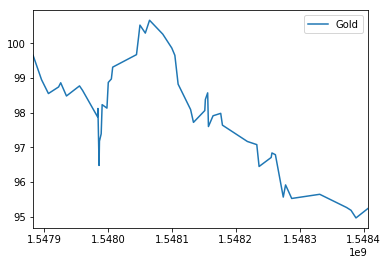

In [180]:
transation_log[transation_log['action'] != 'brought'][:50][['Gold']].plot()

In [181]:
transaction_display = transation_log#['time_end']

In [182]:

transaction_display['time_start'] = transaction_display.index
transaction_display['time_end'] = round(transaction_display['time_start'].shift(-1), 0)

transaction_display['action_to_color'] = transaction_display['action'].shift(-1)

In [183]:
transaction_display['colour_section'] = transaction_display['action_to_color'].apply(lambda x: 'r' if x == 'stop_loss_hit' else 'g')

In [184]:
transaction_display.index

Int64Index([1547880900, 1547883000, 1547894100, 1547896200, 1547904900,
            1547907000, 1547922300, 1547922900, 1547925000, 1547926200,
            ...
            1553835300, 1553837400, 1553854200, 1553856300, 1553856900,
            1553859000, 1553859300, 1553860800, 1553868900, 1553871000],
           dtype='int64', length=1164)

In [185]:
transaction_display[transaction_display['action'] == 'brought'].head(3)

,Gold,XRP_Amount,action,price_action_happened,time_start,time_end,action_to_color,colour_section
1547880900,0.0,311.1054,brought,0.320792,1547880900,1.547883e+09,time_stop,g
1547894100,0.0,301.3852,brought,0.329978,1547894100,1.547896e+09,time_stop,g
1547904900,0.0,302.1940,brought,0.326771,1547904900,1.547907e+09,time_stop,g


In [186]:
transaction_display.head()

,Gold,XRP_Amount,action,price_action_happened,time_start,time_end,action_to_color,colour_section
1547880900,0.00,311.1054,brought,0.320792,1547880900,1.547883e+09,time_stop,g
1547883000,99.65,0.0000,time_stop,0.320951,1547883000,1.547894e+09,brought,g
1547894100,0.00,301.3852,brought,0.329978,1547894100,1.547896e+09,time_stop,g
1547896200,98.95,0.0000,time_stop,0.327319,1547896200,1.547905e+09,brought,g
1547904900,0.00,302.1940,brought,0.326771,1547904900,1.547907e+09,time_stop,g


In [187]:
trading_data.head()

,datetime_real,date,close,high,low,open,quoteVolume,volume,weightedAverage,Increase_0.5_percent,2H_RA_on_Close,below_2H
410000,2019-01-19 04:45:00,1547873100,0.323119,0.323119,0.323119,0.323119,0.0,0.0,0.323119,1547892000,NaN,NaN
410001,2019-01-19 04:50:00,1547873400,0.323119,0.323119,0.323119,0.323119,0.0,0.0,0.323119,1547892000,NaN,NaN
410002,2019-01-19 04:55:00,1547873700,0.323119,0.323119,0.323119,0.323119,0.0,0.0,0.323119,1547892000,NaN,NaN
410003,2019-01-19 05:00:00,1547874000,0.323119,0.323119,0.323119,0.323119,0.0,0.0,0.323119,1547892000,NaN,NaN
410004,2019-01-19 05:05:00,1547874300,0.323119,0.323119,0.323119,0.323119,0.0,0.0,0.323119,1547892000,0.323119,0.0


In [188]:
time_of_trade=  trading_data.groupby('Increase_0.5_percent').agg({'date':'min'}).reset_index()

In [189]:
len(time_of_trade)

2062

In [190]:
74/2062

0.03588748787584869

In [191]:
time_waiting_stats = pd.DataFrame.from_dict(Counter(time_of_trade['Increase_0.5_percent'] - time_of_trade['date']), orient='index')/len(time_of_trade)

In [192]:
120*60

7200

In [193]:
time_waiting_stats.sort_index(ascending= True).cumsum().head(5)#.plot()

,0
300,0.258002
600,0.331232
900,0.382638
1200,0.422890
1500,0.458778


(1547873100, 1548022800)

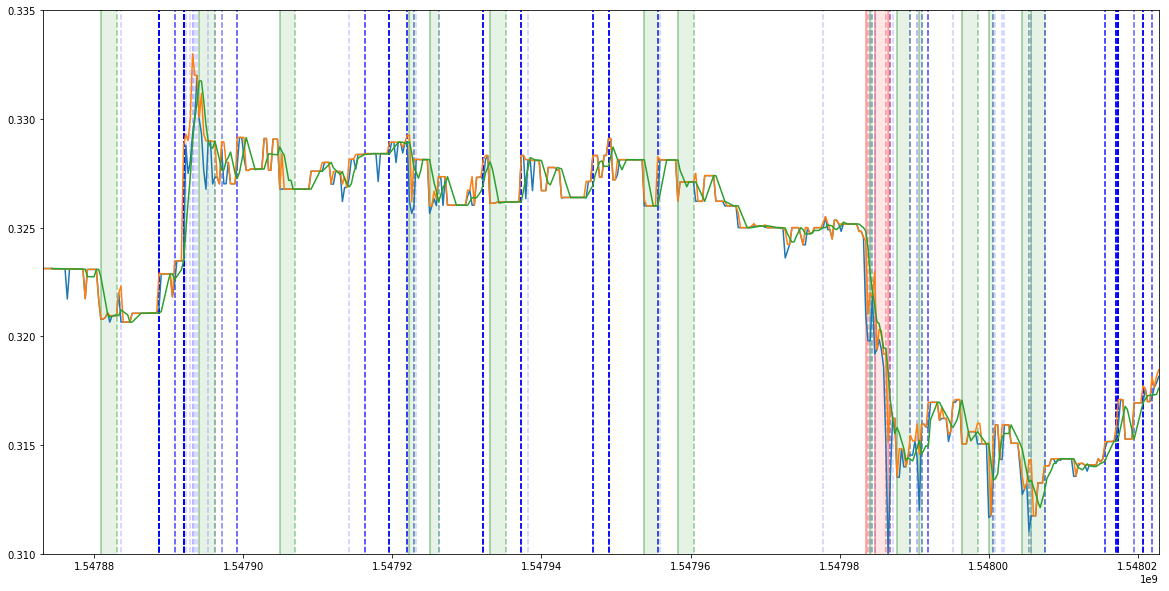

In [194]:
ploting_breakdown = trading_data[:500]

plt.figure(figsize= (20,10))


tran_y_low = ploting_breakdown['low']
tran_y_high = ploting_breakdown['high']

tran_y_ra = ploting_breakdown['2H_RA_on_Close']

tran_x = ploting_breakdown['date']


plt.plot(tran_x, tran_y_low)
plt.plot(tran_x, tran_y_high)

plt.plot(tran_x, tran_y_ra)

# plotting transaction
for ind, value in transaction_display[ (transaction_display['time_start'] <= ploting_breakdown['date'].max()) &
                                       (transaction_display['time_start'] >= ploting_breakdown['date'].min()) &                      
                                       (transaction_display['action'] == 'brought')].iterrows():

    plt.axvspan(value['time_start'], value['time_end'], alpha = 0.1 , facecolor = value['colour_section'])
    
    plt.vlines(value['time_start'], 0,1, alpha = 0.4, color = value['colour_section'])
    plt.vlines(value['time_end'], 0,1, alpha = 0.4, color = value['colour_section'], linestyle = 'dashed')
    
    
for ind, value in ploting_breakdown[ploting_breakdown['Increase_0.5_percent'] <= ploting_breakdown['date'].max()].iterrows():
#     print(value['Increase_0.5_percent'])
#     plt.vlines(value['date'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')
    plt.vlines(value['Increase_0.5_percent'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')
    

plt.ylim(0.31, 0.335)

plt.xlim(ploting_breakdown['date'].min(), ploting_breakdown['date'].max())

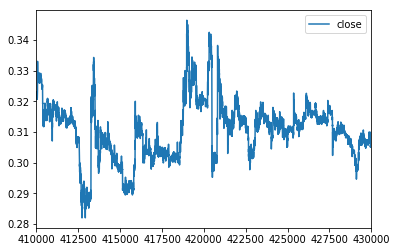

In [195]:
trading_data[['close']].plot()

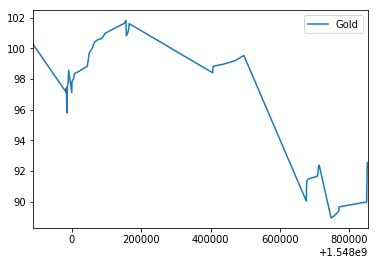

In [375]:
transation_log[transation_log['action'] != 'brought'][:50][['Gold']].plot()